In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

In [ ]:
# Ensure nltk resources are downloaded
nltk.download('stopwords')

# Load the dataset
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Combine train and test datasets
data = newsgroups_train.data + newsgroups_test.data

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data, columns=['text'])

In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove all special characters
    text = re.sub(r'\s+', ' ', text)  # Remove all single characters
    text = text.lower()  # Convert to lower case
    text = text.split()  # Split into words
    stop_words = set(stopwords.words('english'))  # Remove stop words
    text = [word for word in text if word not in stop_words]
    text = ' '.join(text)
    return text

# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocess_text)

In [ ]:
# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['processed_text'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=20, random_state=42)  # Adjust n_components (number of topics) as needed
lda.fit(X)

# Display the top words in each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

Topic 0:
space armenian turkish armenians nasa university earth launch new russian
Topic 1:
mr stephanopoulos ms president myers ground wire know white house
Topic 2:
cx w7 c_ uw t7 ck hz chz lk w1
Topic 3:
ax max g9v b8f a86 pl 145 1d9 0t 1t
Topic 4:
said like know went people think time going years got
Topic 5:
00 10 25 20 15 12 11 14 50 16
Topic 6:
people think like know time right said israel going say
Topic 7:
drive like know new car card thanks use scsi used
Topic 8:
entry file output program int null char entries define rules
Topic 9:
medical disease health cancer patients information hiv drug study treatment
Topic 10:
government key gun law people chip encryption use fbi clipper
Topic 11:
right militia people amendment april second arms bear 25 constitution
Topic 12:
dod period power second bike play pp motorcycle scorer line
Topic 13:
edu com mail file dos db information internet cs send
Topic 14:
windows image file jpeg files dos color gif images bit
Topic 15:
mk mm mp bm mu 

In [ ]:
# Vectorize the text using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Fit K-means model
num_clusters = 20  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

# Assign clusters to documents
df['cluster'] = kmeans.labels_

# Display the documents grouped by clusters
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['text'].values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Streaming output truncated to the last 5000 lines.
 'If you are interested in receiving the final player stats for\nthe 1992-1993 NHL Season as well as playoff box scores, stats and\nscores/updates...\nthen e-mail my stat server\n\nmmilitzo@skidmore.edu'
 "With everyone bitching about the hockey coverage by ESPN its almost like the \nDetroit-Toronto game was not televised last nite.  I was just thankful to see\nhockey on a night that it wasn't supposed to be carried.  Thanks to ESPN, no\nmatter why they televised the game"
 "This is a general question for US readers:\n\nHow extensive is the playoff coverage down there?  In Canada, it is almost\nimpossible not to watch a series on TV (ie the only two series I have not had\nan opportunity to watch this year are Wash-NYI and Chi-Stl, the latter because\nI'm in the wrong time zone!).  We (in Canada) are basically swamped with \ncoverage, and I wonder how many series/games are televised nationally or even\nlocally in the US and how much pre

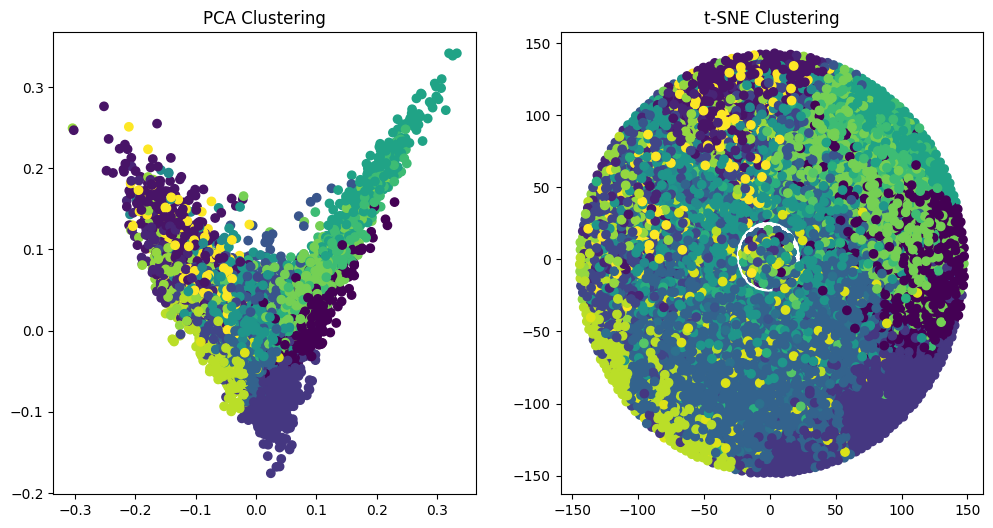

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reduce dimensions using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Plot PCA clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'])
plt.title('PCA Clustering')

# Plot t-SNE clusters
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'])
plt.title('t-SNE Clustering')

plt.show()